<a href="https://colab.research.google.com/github/ayamgulai/etika-ti-sentiment/blob/main/Lab_2_NLP_ETI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
url_github = "https://raw.githubusercontent.com/ayamgulai/etika-ti-sentiment/main/"

df1 = pd.read_csv(url_github + "eti-ai_hak_cipta.csv")
df2 = pd.read_csv(url_github + "eti-ai_hak_cipta_seni.csv")
df3 = pd.read_csv(url_github + "eti-ai_pelanggaran.csv")

In [3]:
# Gabungkan semua
df_all = pd.concat([df1, df2, df3], ignore_index=True)
print(f"Total sebelum hapus duplikat: {len(df_all)}")

Total sebelum hapus duplikat: 879


In [30]:
# Berdasarkan id_str (lebih aman)
df_all_drop = df_all.drop_duplicates(subset='id_str')
print(f"Total setelah hapus duplikat berdasarkan id_str: {len(df_all_drop)}")

Total setelah hapus duplikat berdasarkan id_str: 840


In [5]:
import re

In [6]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.6 MB/s eta 0:00:00


In [7]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [29]:
# Keyword pencarian yang ingin dihapus
keywords = [" ai ", "hak cipta", "pelanggaran", "seni", "ai hak cipta", "ai pelanggaran", "ai seni hak cipta"]
added_stopwords = [" yg ", " ga ", "jadi"]

# Stopword remover
stop_factory = StopWordRemoverFactory()
stopword_remover = stop_factory.create_stop_word_remover()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+", "", text)  # hapus URL
    text = re.sub(r"@\w+", "", text)     # hapus mention
    text = re.sub(r"#\w+", "", text)     # hapus hashtag
    text = re.sub(r"\d+", "", text)      # hapus angka
    text = re.sub(r"[^\w\s]", "", text)  # hapus tanda baca
    for kw in keywords:
        text = text.replace(kw, "")      # hapus keyword
    for ad in added_stopwords:
        text = text.replace(ad, "")
    text = stopword_remover.remove(text) # hapus stopwords
    return text.strip()

In [31]:
df_all_drop['clean_text'] = df_all_drop['full_text'].astype(str).apply(clean_text)
df_all_drop = df_all_drop[df_all_drop['clean_text'] != '']

<ipython-input-31-efc9f1fd7d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all_drop['clean_text'] = df_all_drop['full_text'].astype(str).apply(clean_text)


In [32]:
df_all_drop

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean_text
0,1924759524550025266,Tue May 20 09:30:05 +0000 2025,0,Elton John Tuding Pemerintah Inggris Dukung AI...,1924759524550025266,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192475952455002...,990237626,NaN,elton john tuding pemerintah inggris dukungcuri
1,1924715979805999579,Tue May 20 06:37:03 +0000 2025,0,Elton John Murka: Pemerintah Inggris dan Ancam...,1924715979805999579,https://pbs.twimg.com/media/GrX27fSbAAIcAu8.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192471597980599...,1911740506847297536,NaN,elton john murka pemerintah inggris ancamanter...
2,1924704839273218115,Tue May 20 05:52:47 +0000 2025,6,Penyanyi legendaris Elton John mengecam keras ...,1924704839273218115,NaN,NaN,in,NaN,0,0,3,https://x.com/undefined/status/192470483927321...,23343960,NaN,penyanyi legendaris elton john mengecam keras ...
3,1924469660302623177,Mon May 19 15:01:36 +0000 2025,0,@firartfolio Sebenarnya tugas akhir aku tentan...,1924480564104745152,NaN,firartfolio,in,NaN,0,0,0,https://x.com/undefined/status/192448056410474...,1463426677908799495,NaN,sebenarnya tugas akhir aku ilustrasijd mayan p...
4,1924321618232283611,Mon May 19 04:30:00 +0000 2025,0,Well said Elton John! Musisi Legendaris Elton ...,1924321618232283611,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/192432161823228...,902837643024539651,NaN,well said elton john musisi legendaris elton j...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874,1833774468172525952,Wed Sep 11 07:47:57 +0000 2024,0,heran haruskah kalau nyontek itu ada teguran d...,1833774468172525952,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/183377446817252...,2240488700,NaN,heran haruskah kalau nyontek ada teguran dulu ...
875,1831222753149747568,Wed Sep 04 06:48:21 +0000 2024,3,Suno dan Udio Hadapi Masalah Hukum Terkait Dug...,1831222753149747568,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/183122275314974...,1702957163059257344,NaN,suno udio hadapi masalah hukum terkait dugaan ...
876,1830790136684257355,Tue Sep 03 11:09:50 +0000 2024,0,@secr3thm4nz56 bahkan chatGp AI google tidak m...,1830926170017411239,NaN,secr3thm4nz56,in,NaN,0,0,0,https://x.com/undefined/status/183092617001741...,957997845595893760,NaN,bahkan chatgpgoogle mampu menjawab ttg ham in...
877,1829518262037844148,Fri Aug 30 13:55:19 +0000 2024,0,yuk bisa yuk semua agensi buka suara tentang A...,1829518262037844148,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/182951826203784...,1289207252595822592,NaN,yuk yuk semua agensi buka suara tentangkarna e...


In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 124.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
import torch

In [33]:
# Load model IndoBERT sentiment (trained on IndoNLU)
model_name = "indobenchmark/indobert-base-p1"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained("crypter70/IndoBERT-Sentiment-Analysis")  # pretrained sentiment

classifier = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Batasi data jika terlalu besar
texts = df_all_drop['clean_text'].tolist()

# Label otomatis (batching)
sentiments = classifier(texts, truncation=True)

# Masukkan hasil ke dataframe
df_all_drop['sentiment'] = [s['label'].lower() for s in sentiments]


Device set to use cpu
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

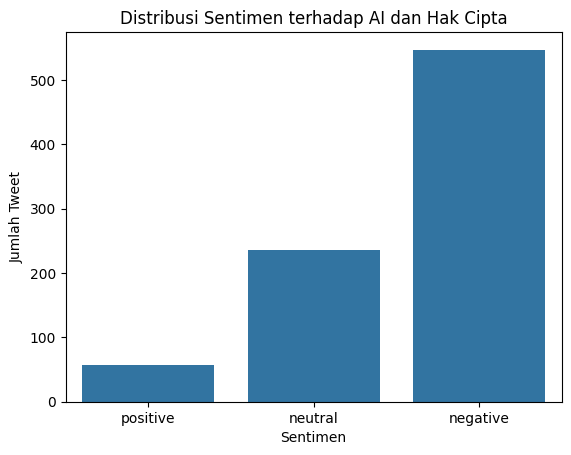

In [35]:
# Countplot sentimen
sns.countplot(data=df_all_drop, x='sentiment', order=['positive', 'neutral', 'negative'])
plt.title('Distribusi Sentimen terhadap AI dan Hak Cipta')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Tweet')
plt.show()

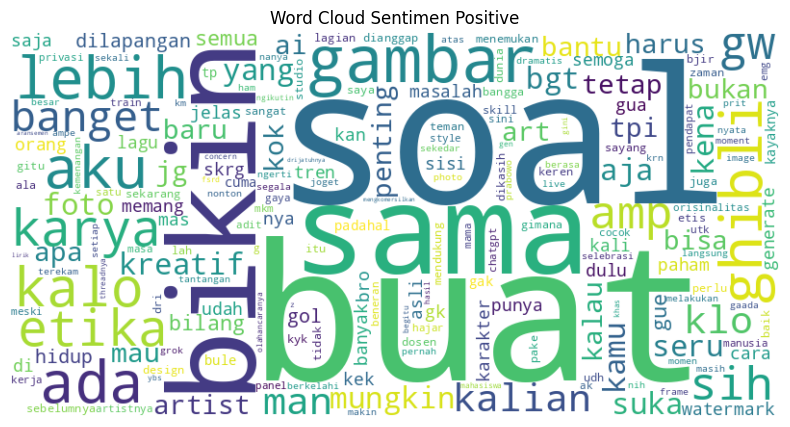

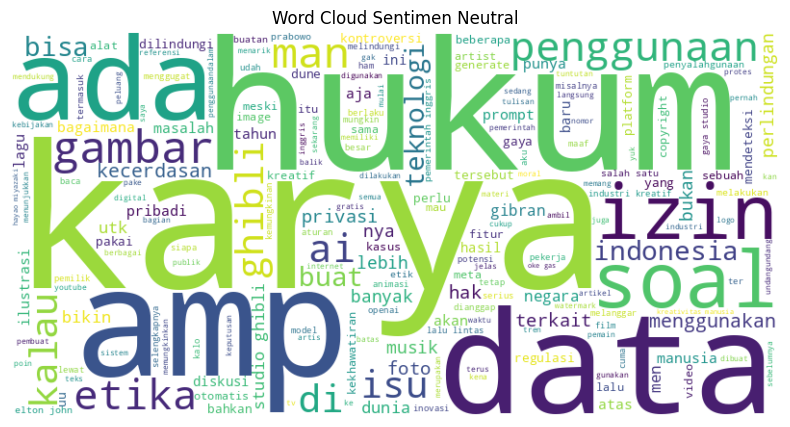

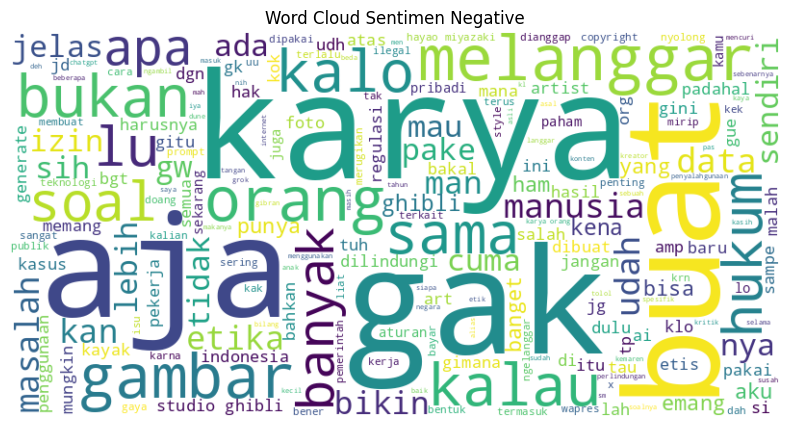

In [36]:
from wordcloud import WordCloud

for label in ['positive', 'neutral', 'negative']:
    text = " ".join(df_all_drop[df_all_drop['sentiment'] == label]['clean_text'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'Word Cloud Sentimen {label.capitalize()}')
    plt.axis('off')
    plt.show()


In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Gunakan CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df_all_drop['clean_text'])

# Topik LDA
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(X)

# Tampilkan topik
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topik #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

print_top_words(lda, vectorizer.get_feature_names_out(), 10)


Topik #0:
karya ghibli gak buat gambar melanggar hukum manusia izin etika
Topik #1:
kalau gambar karya bukan orang artist mau bikin soal kan
Topik #2:
aja ham lebih hukum kalo amp data gue lu banyak


In [38]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [39]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenisasi dan kumpulkan kata-kata untuk setiap label
def get_tokens_by_sentiment(df, label):
    texts = df[df['sentiment'] == label]['clean_text'].tolist()
    all_words = []
    for text in texts:
        tokens = word_tokenize(text)
        all_words.extend(tokens)
    return all_words


In [40]:
# Hitung frekuensi kata per kategori sentimen
positive_words = Counter(get_tokens_by_sentiment(df_all_drop, 'positive'))
negative_words = Counter(get_tokens_by_sentiment(df_all_drop, 'negative'))
neutral_words  = Counter(get_tokens_by_sentiment(df_all_drop, 'neutral'))

# Ambil 10 besar
top_pos = positive_words.most_common(10)
top_neg = negative_words.most_common(10)
top_neu = neutral_words.most_common(10)

In [41]:
df_freq = pd.DataFrame({
    'POSITIVE': [f"{w[0]} ({w[1]})" for w in top_pos],
    'NEGATIVE': [f"{w[0]} ({w[1]})" for w in top_neg],
    'NEUTRAL':  [f"{w[0]} ({w[1]})" for w in top_neu]
})

print(df_freq)

      POSITIVE        NEGATIVE      NEUTRAL
0    soal (13)     karya (121)   karya (44)
1    buat (13)       gak (106)   hukum (35)
2    sama (12)       aja (102)  ghibli (27)
3   bikin (11)      orang (86)     amp (26)
4  gambar (10)       buat (84)    data (26)
5    lebih (8)     gambar (82)     ada (25)
6      aku (8)  melanggar (81)    soal (24)
7   ghibli (8)     ghibli (78)    izin (23)
8      ada (8)      bukan (74)  gambar (23)
9     kalo (7)       kalo (69)     man (21)


In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_words(counter, title):
    top_words = counter.most_common(10)
    words, counts = zip(*top_words)
    plt.figure(figsize=(8, 4))
    sns.barplot(x=list(counts), y=list(words), palette="pastel")
    plt.title(title)
    plt.xlabel("Frekuensi")
    plt.ylabel("Kata")
    plt.show()

<ipython-input-42-c992721492df>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="pastel")


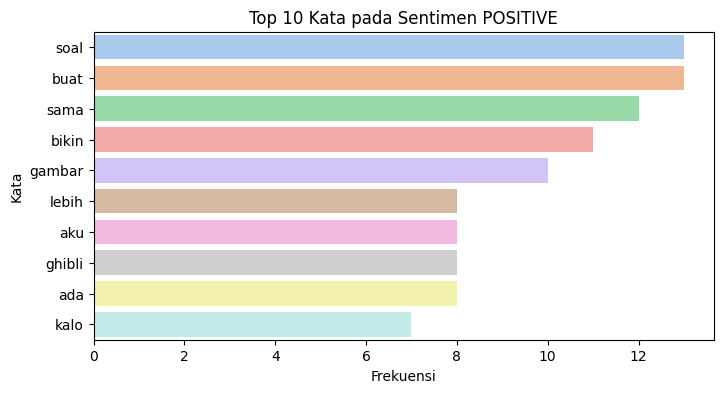

<ipython-input-42-c992721492df>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="pastel")


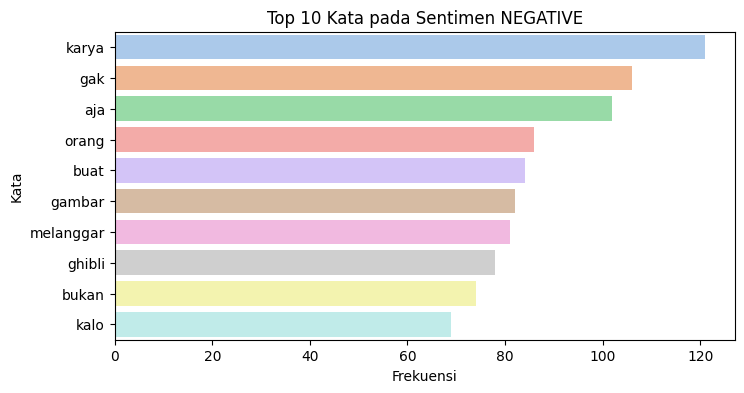

<ipython-input-42-c992721492df>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="pastel")


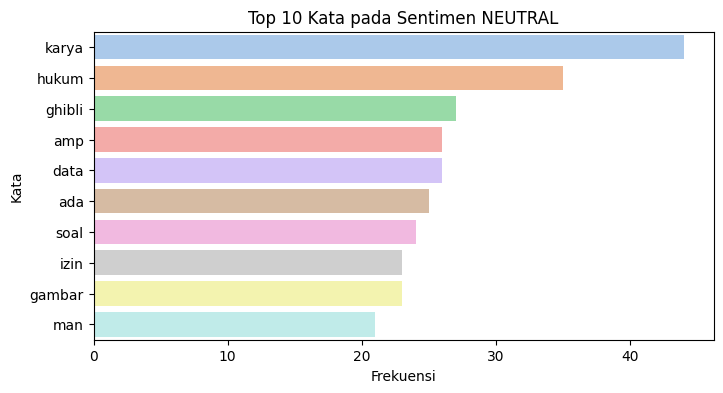

In [43]:
plot_top_words(positive_words, "Top 10 Kata pada Sentimen POSITIVE")
plot_top_words(negative_words, "Top 10 Kata pada Sentimen NEGATIVE")
plot_top_words(neutral_words, "Top 10 Kata pada Sentimen NEUTRAL")